(Aggarwal 2.7)

Download the Musk data set from the UCI Machine Learning Repository. Apply PCA to the data set, and report the eigenvectors and eigenvalues (hint: pca implemented in sklearn)

In [ ]:
import pandas as pd
import numpy as np

labels=['molecule', 'conformation']+list(range(166)) +['class']
df = pd.read_csv('/content/drive/MyDrive/data/_musk/clean2.data', names=labels)

In [ ]:
df

,molecule,conformation,0,1,2,3,4,5,6,7,...,157,158,159,160,161,162,163,164,165,class
0,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,...,-308,52,-7,39,126,156,-50,-112,96,1.0
1,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,...,-59,-2,52,103,136,169,-61,-136,79,1.0
2,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,...,-134,-154,57,143,142,165,-67,-145,39,1.0
3,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,136,168,-60,-135,80,1.0
4,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,137,168,-60,-135,80,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,...,-66,164,-14,-29,107,171,-44,-115,118,0.0
6594,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,...,-51,166,-9,150,129,158,-66,-144,-5,0.0
6595,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,...,90,117,-8,150,130,159,-66,-144,-6,0.0
6596,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,...,86,99,-14,-31,106,171,-44,-116,117,0.0


In [ ]:
# rimuove le prime 2 colonne e l'ultima ed esporta i dati a un array NumPy
df2 = df.iloc[:, 2:-1]
d = df2.to_numpy(copy=True)
d.shape

(6598, 166)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.80, svd_solver='full') # prende solo l'80% della varianza
d_new = pca.fit(d).transform(d) # trasforma i dati proiettando lungo le direzioni principali

pca.n_components_

11

In [ ]:
pca.explained_variance_ratio_

array([0.35020974, 0.19804048, 0.0582656 , 0.03534038, 0.03106128,
       0.02822251, 0.02539075, 0.02276298, 0.01950551, 0.0185404 ,
       0.01482662])

In [ ]:
# dimensioni del dataset dopo la riduzione
d_new.shape

(6598, 11)

In [ ]:
# dimensioni dataset originale
d.shape

(6598, 166)

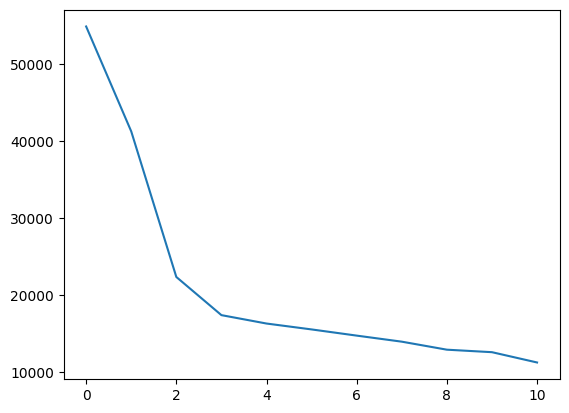

In [ ]:
import matplotlib.pyplot as plt
plt.plot(pca.singular_values_)

In [ ]:
# media del dataset originale la ritroviamo in pca.mean_
d.mean(axis=0) - pca.mean_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

(Aggarwal 2.8)

Repeat the previous exercise using SVD (hint: svd implemented in numpy.linalg.svd)

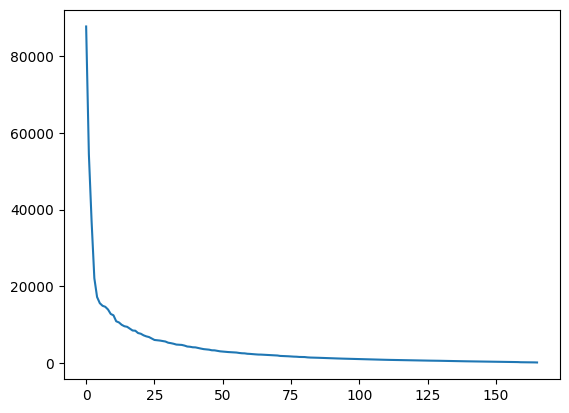

In [ ]:
from numpy.linalg import svd

sigma=svd(d, compute_uv=False)
plt.plot(sigma)

In [ ]:
sigma

array([87765.40969139, 54418.11086264, 36875.51290651, 22121.42906393,
       17210.02170661, 15603.09618991, 14927.74822205, 14658.7644761 ,
       13956.90584937, 12791.33894184, 12441.02471382, 10883.81197844,
       10582.02186257,  9965.83064669,  9587.1649647 ,  9437.81694782,
        8954.92853802,  8480.78707334,  8416.90689728,  7813.45987199,
        7635.13401107,  7225.05323874,  6951.33767471,  6769.85369701,
        6399.78373646,  6011.7371573 ,  5939.4473699 ,  5853.30656476,
        5726.58529452,  5607.00961218,  5298.78704111,  5177.72766881,
        5020.64742764,  4811.47478017,  4763.44212362,  4716.20393553,
        4540.98812126,  4299.93751702,  4238.71090043,  4103.76772528,
        4074.07181305,  3906.96446117,  3763.37122662,  3620.89484095,
        3545.67337252,  3476.28474976,  3318.82008602,  3300.70111709,
        3179.69565626,  3048.23621602,  2976.85053712,  2925.20060587,
        2857.71678223,  2807.22905549,  2739.18491477,  2730.47043512,
      

In [ ]:
# centralizzo il dataset e ricalcolo SVD
d2 = d - d.mean(axis=0)
sigma2 = svd(d2, compute_uv=False)

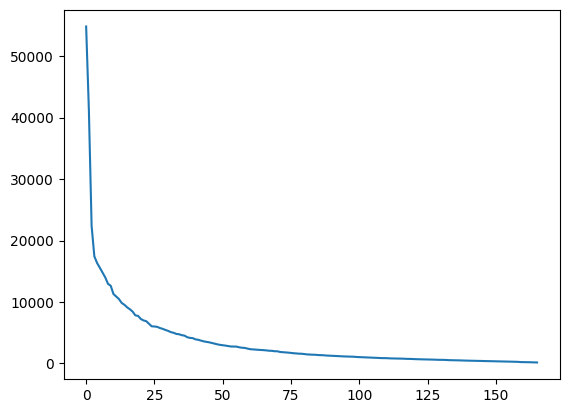

In [ ]:
plt.plot(sigma2)

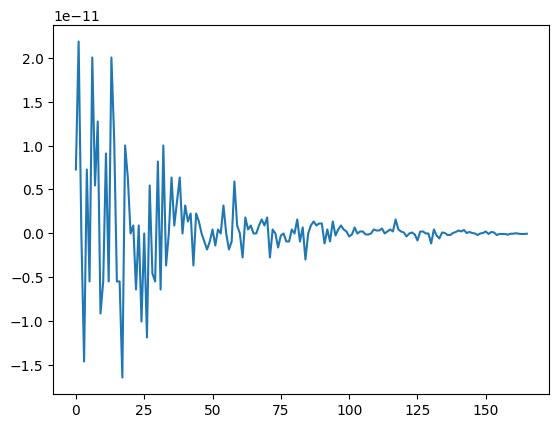

In [ ]:
# la sigma ottenuta dalla matrice del dataset centrata sulla media
# è uguale ai valori singolari di PCA
pca = PCA()
pca.fit(d)
plt.plot(sigma2-pca.singular_values_)

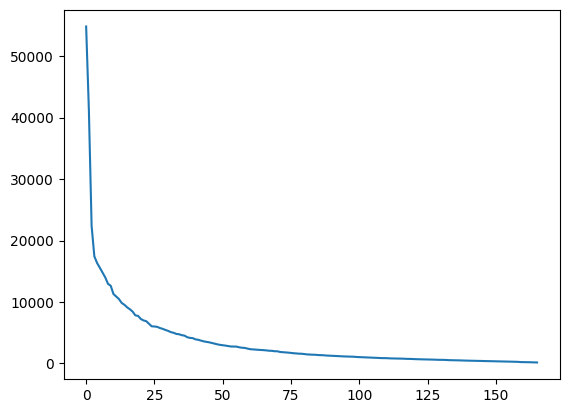

In [ ]:
# Faccio PCA di dati a media nulla
# i valori singolari non cambiano perchè PCA centra il dataset sulla media
pca.fit(d2)
plt.plot(pca.singular_values_)

In [ ]:
# Calcolo PCA come eigendecomposition della matrice di covarianza
from numpy.linalg import eig

C = np.matmul(d2.T, d2)
l,v = eig(C)

In [ ]:
v.shape

(166, 166)

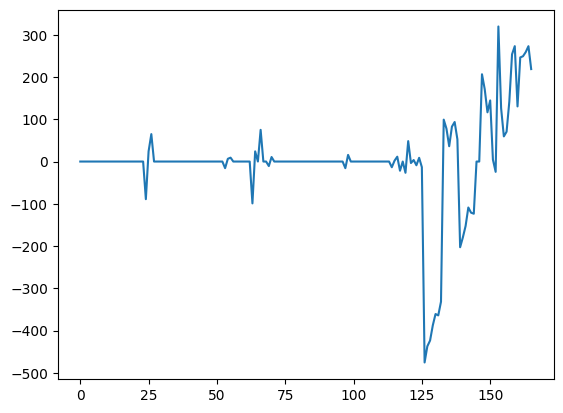

In [ ]:
# gli autovalori della matrice di covarianza non sono ordinati correttamente
# e sembrano diversi dai singular values PCA. Basta ordinarli.
plt.plot(np.sqrt(l)-pca.singular_values_)

In [ ]:
# Ordino le radici quadrate degli autovalori e visualizzo in ordine inverso
np.sort(np.sqrt(l))[::-1]

array([54850.42103375, 41247.0446625 , 22372.88299965, 17424.14411487,
       16335.2392005 , 15570.89807338, 14769.08518471, 13983.96874878,
       12944.77414756, 12620.46513966, 11285.91804573, 10864.11081087,
       10466.23239696,  9835.90040698,  9533.89993279,  9119.74218145,
        8806.12180425,  8423.24075288,  7813.57168988,  7722.45870907,
        7226.20508032,  6985.99901194,  6856.68146856,  6428.66598781,
        6024.10207911,  5999.93424694,  5935.02701125,  5746.11739155,
        5614.88353001,  5436.01366743,  5283.32655869,  5079.9672104 ,
        4970.59134518,  4786.46875876,  4734.10713833,  4582.00238104,
        4509.5156342 ,  4247.08148331,  4142.00747691,  4101.76748586,
        3907.71266195,  3832.2165028 ,  3703.23828179,  3575.80922415,
        3501.74823995,  3418.61347361,  3318.31761786,  3197.41004904,
        3090.62946792,  3006.35618401,  2954.20672127,  2884.13111251,
        2811.07184771,  2739.40759551,  2732.93202121,  2723.74244004,
      

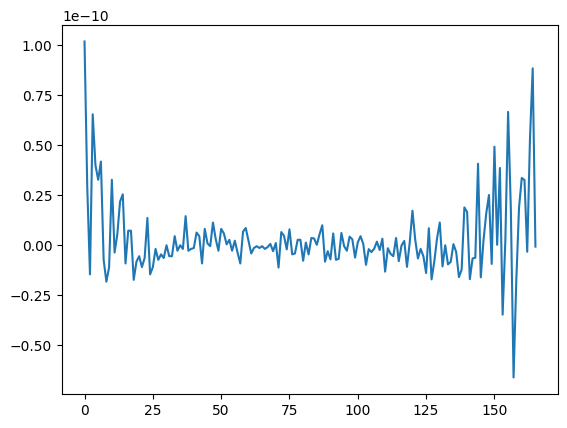

In [ ]:
plt.plot(np.sort(np.sqrt(l))[::-1] - pca.singular_values_)

In [ ]:
# Gli autovettori della matrice di covarianza sono ortonormali
# per cui v * v.T deve essere la natrice I
np.matmul(v, v.T)

array([[ 1.00000000e+00,  4.22919015e-14,  8.60859938e-13, ...,
        -4.96359989e-14, -1.07577758e-15, -2.63059456e-14],
       [ 4.22919015e-14,  1.00000000e+00,  1.29917778e-13, ...,
        -4.40216711e-14,  2.82337088e-14, -7.55322996e-15],
       [ 8.60859938e-13,  1.29917778e-13,  1.00000000e+00, ...,
        -1.06701106e-13,  7.37359392e-14, -2.58374051e-14],
       ...,
       [-4.96359989e-14, -4.40216711e-14, -1.06701106e-13, ...,
         1.00000000e+00, -3.97588592e-14,  1.02541199e-14],
       [-1.07577758e-15,  2.82337088e-14,  7.37359392e-14, ...,
        -3.97588592e-14,  1.00000000e+00, -1.58799094e-14],
       [-2.63059456e-14, -7.55322996e-15, -2.58374051e-14, ...,
         1.02541199e-14, -1.58799094e-14,  1.00000000e+00]])

(Aggarwal 2.11)

Download the Intel Research Berkeley data set. Apply a wavelet transformation to the temperature values in the first sensor.

In [3]:
import pandas as pd
import numpy as np

labels=['date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light', 'voltage']
df = pd.read_csv('intel-lab-data.txt', sep=' ', names=labels)

In [4]:
df

,date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2.0,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3.0,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11.0,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17.0,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18.0,1.0,19.1750,38.83790,45.08,2.69964
...,...,...,...,...,...,...,...,...
48869,2004-03-02,12:11:06.786959,9985.0,2.0,23.3498,32.58030,412.16,2.67532
48870,2004-03-02,12:10:53.665991,9986.0,2.0,23.3792,32.51020,412.16,2.67532
48871,2004-03-02,12:12:54.570303,9990.0,2.0,23.3792,32.36980,412.16,2.67532
48872,2004-03-02,12:15:28.755912,9994.0,2.0,23.4184,32.29950,412.16,2.67532


Il dataset è troppo incompleto per fare un'analisi wavelet sensata. Cambiamo quindi l'esercizio.

**Estrarre solo i dati di moteid 1.0 dei primi 5 giorni di marzo 2004 e interpolare i dati delle epoch mancanti**

In [5]:
# Prendo dal dataframe soltanto le righe in cui moteid è 1.0
df['moteid']==1.0

0         True
1         True
2         True
3         True
4         True
         ...  
48869    False
48870    False
48871    False
48872    False
48873    False
Name: moteid, Length: 48874, dtype: bool

In [6]:
df1 = df[df['moteid']==1.0]
print(df1.shape)
print(df.shape)

(43047, 8)
(48874, 8)


In [7]:
# Prendo le righe in cui date è compreso fra 2004-03-01 e 2004-03-05
df1 = df1[df1['date'] <= '2004-03-05']
df1 = df1[df1['date'] >= '2004-03-01']

In [8]:
df1

,date,time,epoch,moteid,temperature,humidity,light,voltage
3054,2004-03-01,00:01:57.13085,5648.0,1.0,18.4498,43.1191,43.24,2.67532
3055,2004-03-01,00:02:50.458234,5650.0,1.0,18.4400,43.0858,43.24,2.66332
3056,2004-03-01,00:04:26.606602,5653.0,1.0,18.4400,43.1191,43.24,2.65143
3057,2004-03-01,00:05:28.379208,5655.0,1.0,18.4498,43.0524,43.24,2.65143
3058,2004-03-01,00:05:50.456126,5656.0,1.0,18.4302,43.1525,43.24,2.66332
...,...,...,...,...,...,...,...,...
12411,2004-03-05,23:55:37.162006,20035.0,1.0,20.5176,40.8043,48.76,2.62796
12412,2004-03-05,23:56:02.568789,20036.0,1.0,20.5274,40.8043,48.76,2.62796
12413,2004-03-05,23:57:06.7549,20038.0,1.0,20.5372,40.8381,48.76,2.62796
12414,2004-03-05,23:57:34.649744,20039.0,1.0,20.5372,40.9055,48.76,2.62796


In [9]:
# Prendo solo le colonne epoch e temperature
dft=df1[['epoch', 'temperature']].copy()

In [10]:
dft

,epoch,temperature
3054,5648.0,18.4498
3055,5650.0,18.4400
3056,5653.0,18.4400
3057,5655.0,18.4498
3058,5656.0,18.4302
...,...,...
12411,20035.0,20.5176
12412,20036.0,20.5274
12413,20038.0,20.5372
12414,20039.0,20.5372


In [11]:
# Riordino per epoca e creo un nuovo indice
dft = dft.sort_values('epoch').reset_index().loc[:, ['epoch', 'temperature']]

In [12]:
dft

,epoch,temperature
0,5648.0,18.4498
1,5650.0,18.4400
2,5653.0,18.4400
3,5655.0,18.4498
4,5656.0,18.4302
...,...,...
9357,20035.0,20.5176
9358,20036.0,20.5274
9359,20038.0,20.5372
9360,20039.0,20.5372


In [13]:
# Bisogna scorrere il dataframe e se si trovano epoche mancanti
# aggiungerle col valore interpolato da linspace
import numpy as np

for r in range(1, len(dft)):
  delta = int(dft.iloc[r, 0]-dft.iloc[r-1, 0])
  if delta != 1:
    # inserisce i valori interpolati nelle epoch mancanti
    missing_val = np.linspace(dft.iloc[r-1, 1], dft.iloc[r, 1], delta, endpoint=False)[1:]
    missing_epoch = dft.iloc[r-1, 0]+1
    for val in missing_val:
      dft.loc[len(dft),:] = {'epoch' : missing_epoch, 'temperature' : val}
      missing_epoch += 1


In [14]:
# Riordino nuovamente per epoca e creo un nuovo indice
dft = dft.sort_values('epoch').reset_index().loc[:, ['epoch', 'temperature']]

In [15]:
dft

,epoch,temperature
0,5648.0,18.4498
1,5649.0,18.4449
2,5650.0,18.4400
3,5651.0,18.4400
4,5652.0,18.4400
...,...,...
14390,20038.0,20.5372
14391,20039.0,20.5372
14392,20040.0,20.5274
14393,20041.0,20.5176


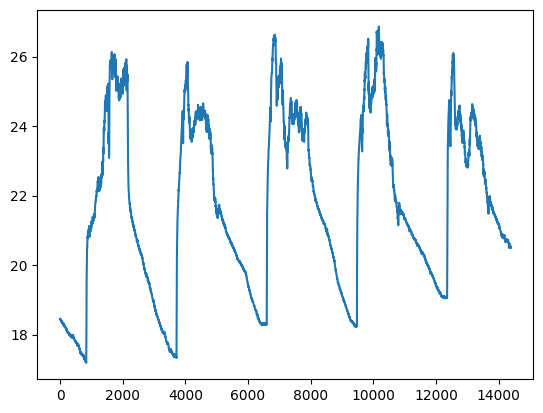

In [17]:
import matplotlib.pyplot as plt
plt.plot(dft.iloc[:, 1])